# Prepare Data

## Import

In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.pipeline import make_pipeline

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.head()

,Bankrupt?,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## Explore

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1   _ROA(C)_before_interest_and_depreciation_before_interest  6819 non-null   float64
 2   _ROA(A)_before_interest_and_%_after_tax                   6819 non-null   float64
 3   _ROA(B)_before_interest_and_depreciation_after_tax        6819 non-null   float64
 4   _Operating_Gross_Margin                                   6819 non-null   float64
 5   _Realized_Sales_Gross_Margin                              6819 non-null   float64
 6   _Operating_Profit_Rate                                    6819 non-null   float64
 7   _Pre-tax_net_Interest_Rate                                6819 non-null   float64
 8   _After-tax_net_Int

In [5]:
(df.isna().sum() > 0).sum()

0

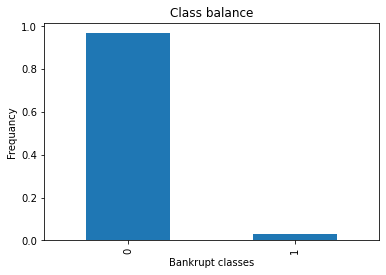

In [6]:
df['Bankrupt?'].value_counts(normalize= True).plot(kind= 'bar')
plt.xlabel("Bankrupt classes")
plt.ylabel("Frequancy")
plt.title("Class balance");

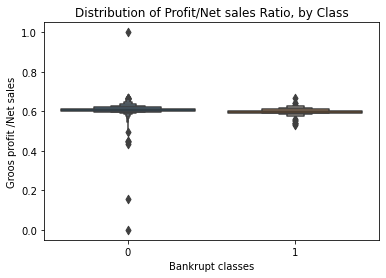

In [7]:
sns.boxenplot(x="Bankrupt?" , y="_Operating_Gross_Margin" , data=df)
plt.xlabel("Bankrupt classes")
plt.ylabel("Groos profit /Net sales")
plt.title("Distribution of Profit/Net sales Ratio, by Class");

In [8]:
df['_Operating_Gross_Margin'].describe().apply("{0:,.0f}".format)

count    6,819
mean         1
std          0
min          0
25%          1
50%          1
75%          1
max          1
Name: _Operating_Gross_Margin, dtype: object

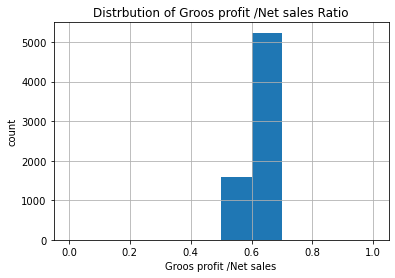

In [9]:
df["_Operating_Gross_Margin"].hist()
plt.xlabel("Groos profit /Net sales")
plt.ylabel("count")
plt.title("Distrbution of Groos profit /Net sales Ratio");

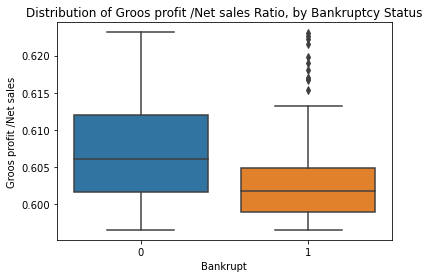

In [10]:
q1 , q9 = df['_Operating_Gross_Margin'].quantile([0.1,0.9])
mask = df["_Operating_Gross_Margin"].between(q1 , q9)
sns.boxplot(x='Bankrupt?' , y='_Operating_Gross_Margin', data= df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("Groos profit /Net sales")
plt.title("Distribution of Groos profit /Net sales Ratio, by Bankruptcy Status");

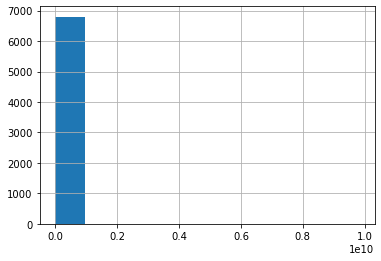

In [11]:
df['_Total_assets_to_GNP_price'].hist();

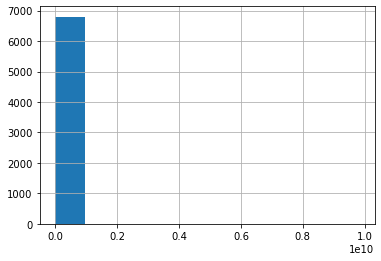

In [12]:
df['_Total_assets_to_GNP_price'].hist();

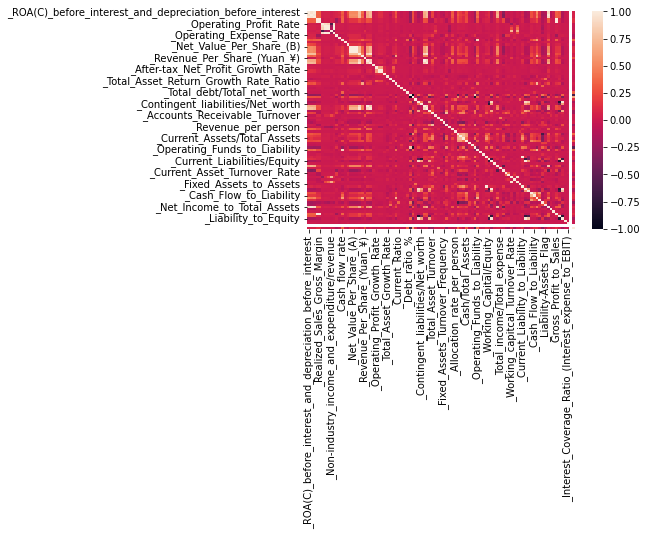

In [13]:
corr = df.drop(columns=['Bankrupt?']).corr()
sns.heatmap(corr);

## Split

In [14]:
target = "Bankrupt?"
X = df.drop(columns=[target])
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6819, 95)
y shape: (6819,)


In [15]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [16]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5455, 95)
y_train shape: (5455,)
X_test shape: (1364, 95)
y_test shape: (1364,)


## Resample

In [17]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over , y_train_over = over_sampler.fit_resample(X_train , y_train)
print(X_train_over.shape)
X_train_over.head()

(10572, 95)


,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,_Continuous_interest_rate_(after_tax),...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.801313,0.005821,0.623649,0.599196,0.840580,0.282564,0.027239,0.566658,1,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.810914,0.000481,0.623932,0.609332,0.841339,0.280570,0.026843,0.565395,1,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.809740,0.001397,0.623714,0.614241,0.840969,0.277772,0.026864,0.565484,1,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.810082,0.000998,0.623986,0.597824,0.841885,0.286871,0.026951,0.565820,1,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.804638,0.002826,0.623845,0.600363,0.840885,0.282073,0.026959,0.565848,1,0.023328


## Build BaseLine

In [18]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.969


## iterate

In [19]:
clf = make_pipeline(RandomForestClassifier(random_state=42))

In [20]:
params= {
    
    "randomforestclassifier__n_estimators":range(25 , 100 , 25),
    "randomforestclassifier__max_depth": range(10 , 70 , 10)
    
}
params

{'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 70, 10)}

In [21]:
model = GridSearchCV(

    clf,
    param_grid= params,
    cv=5,
    n_jobs=-1,
    verbose= 1

)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 70, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

In [22]:
model.fit(X_train_over , y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 70, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

In [23]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.699547,0.031900,0.012773,0.001671,10,25,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979196,0.977778,0.980132,0.978713,0.979659,0.979096,0.000811,17
1,1.414797,0.046326,0.023807,0.007429,10,50,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979669,0.979196,0.980132,0.979186,0.979186,0.979474,0.000378,16
2,2.078956,0.112207,0.029068,0.002590,10,75,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979196,0.980142,0.977294,0.979659,0.978713,0.979001,0.000977,18
3,0.889267,0.068835,0.014102,0.002012,20,25,"{'randomforestclassifier__max_depth': 20, 'ran...",0.985816,0.985816,0.990066,0.988647,0.988647,0.987798,0.001700,15
4,1.625623,0.064373,0.022030,0.001315,20,50,"{'randomforestclassifier__max_depth': 20, 'ran...",0.987234,0.987707,0.989120,0.990066,0.987701,0.988366,0.001060,14
5,2.435875,0.101257,0.030052,0.001007,20,75,"{'randomforestclassifier__max_depth': 20, 'ran...",0.987234,0.988180,0.990066,0.989120,0.988174,0.988555,0.000963,13
6,0.915199,0.040409,0.016604,0.005238,30,25,"{'randomforestclassifier__max_depth': 30, 'ran...",0.992435,0.992908,0.991958,0.991485,0.991485,0.992054,0.000553,12
7,1.783889,0.053952,0.025510,0.005011,30,50,"{'randomforestclassifier__max_depth': 30, 'ran...",0.992435,0.992908,0.993377,0.994324,0.992431,0.993095,0.000707,11
8,2.556857,0.024221,0.033306,0.003131,30,75,"{'randomforestclassifier__max_depth': 30, 'ran...",0.992435,0.992908,0.993377,0.994324,0.992904,0.993190,0.000641,10
9,0.934969,0.026677,0.014004,0.000896,40,25,"{'randomforestclassifier__max_depth': 40, 'ran...",0.992908,0.994326,0.993851,0.993851,0.994797,0.993946,0.000627,9


In [24]:
model.best_params_

{'randomforestclassifier__max_depth': 50,
 'randomforestclassifier__n_estimators': 50}

In [25]:
model.predict(X_train_over)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

## Evaluate

In [26]:
acc_train = model.score(X_train_over , y_train_over)
acc_test = model.score(X_test , y_test)

print(f"Training accuracy: {round(acc_train , 4)}")
print(f"test accuracy: {round(acc_test , 4)}")

Training accuracy: 1.0
test accuracy: 0.967


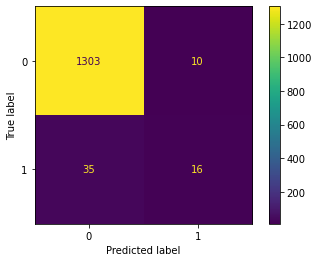

In [27]:
ConfusionMatrixDisplay.from_estimator(

    model,
    X_test,
    y_test
    
);

## Communication

In [28]:
features = X_test.columns
importances = model.best_estimator_.named_steps['randomforestclassifier'].feature_importances_

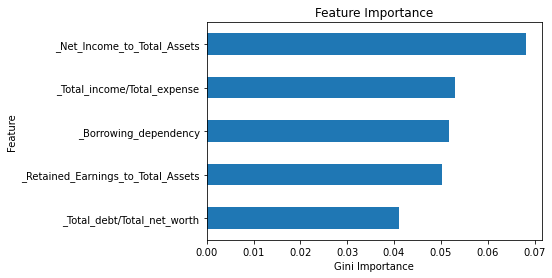

In [29]:
feat_imp = pd.Series(importances , index=features).sort_values()
feat_imp.tail().plot(kind= 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [30]:
with open("model-1" , "wb") as f:
    pickle.dump(model ,f)